In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h2>Kaggle Bike Sharing Demand Dataset</h2>
<h4>Hands-on: Linear Regression with AWS Machine Learning Service</h4>
<h4>To download dataset, sign-in and download from this link: https://www.kaggle.com/c/bike-sharing-demand/data</h4>
<br>
Input Features: ['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'dayofweek']<br>
Target Feature: ['count']<br>
Objective: <quote>You are provided hourly rental data spanning two years. For this competition, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period (Ref: Kaggle.com)</quote>

In [2]:
columns = ['count', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'dayofweek']

In [3]:
df = pd.read_csv('train.csv', parse_dates=['datetime'])
df_test = pd.read_csv('test.csv', parse_dates=['datetime'])

In [4]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [6]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [7]:
# We need to convert datetime to numeric for training.
# Let's extract key features into separate numeric columns
def add_features(df):
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['dayofweek'] = df['datetime'].dt.dayofweek

In [8]:
add_features(df)
add_features(df_test)

In [9]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,5


In [10]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3


In [14]:
set(df.columns) - set(df_test.columns)

{'casual', 'count', 'registered'}

In [15]:
df.corr()['count']

season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
year          0.260403
month         0.166862
day           0.019826
dayofweek    -0.002283
Name: count, dtype: float64

In [16]:
group_month = df.groupby(['month'])

In [18]:
group_month.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,5
431,2011-02-01 00:00:00,1,0,1,2,6.56,9.090,64,7.0015,2,6,8,2011,2,1,1
432,2011-02-01 01:00:00,1,0,1,2,6.56,9.090,69,7.0015,0,3,3,2011,2,1,1
433,2011-02-01 02:00:00,1,0,1,2,6.56,11.365,69,0.0000,0,2,2,2011,2,1,1
434,2011-02-01 03:00:00,1,0,1,2,6.56,11.365,69,0.0000,0,2,2,2011,2,1,1
435,2011-02-01 05:00:00,1,0,1,3,5.74,10.605,93,0.0000,0,3,3,2011,2,1,1


In [19]:
average_by_month = group_month['count'].mean()

In [20]:
average_by_month

month
1      90.366516
2     110.003330
3     148.169811
4     184.160616
5     219.459430
6     242.031798
7     235.325658
8     234.118421
9     233.805281
10    227.699232
11    193.677278
12    175.614035
Name: count, dtype: float64

Text(0.5,1,'Rental Count by Month')

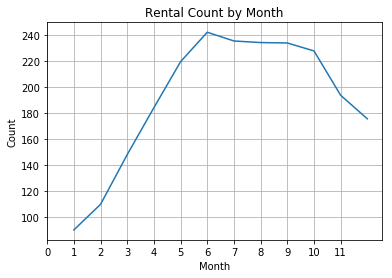

In [21]:
plt.plot(average_by_month.index,average_by_month)
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(np.arange(12))
plt.grid(True)
plt.title('Rental Count by Month')

In [22]:
group_year_month = df.groupby(['year','month'])

In [23]:
average_year_month = group_year_month['count'].mean()

In [24]:
average_year_month

year  month
2011  1         54.645012
      2         73.641256
      3         86.849776
      4        111.026374
      5        174.809211
      6        196.877193
      7        203.614035
      8        182.666667
      9        174.622517
      10       174.773626
      11       155.458333
      12       134.173246
2012  1        124.353201
      2        145.646154
      3        208.276923
      4        257.455947
      5        264.109649
      6        287.186404
      7        267.037281
      8        285.570175
      9        292.598684
      10       280.508772
      11       231.980220
      12       217.054825
Name: count, dtype: float64

2011
month
1      54.645012
2      73.641256
3      86.849776
4     111.026374
5     174.809211
6     196.877193
7     203.614035
8     182.666667
9     174.622517
10    174.773626
11    155.458333
12    134.173246
Name: count, dtype: float64
2012
month
1     124.353201
2     145.646154
3     208.276923
4     257.455947
5     264.109649
6     287.186404
7     267.037281
8     285.570175
9     292.598684
10    280.508772
11    231.980220
12    217.054825
Name: count, dtype: float64


Text(0.5,1,'Rental Count by Year,Month')

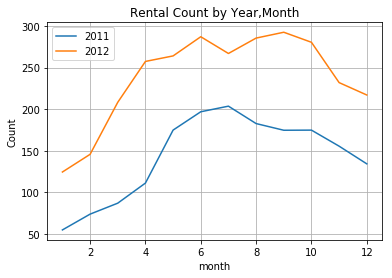

In [25]:
for year in average_year_month.index.levels[0]:
    print (year)
    print(average_year_month[year])
    plt.plot(average_year_month[year].index,average_year_month[year],label=year)
    
plt.legend()    
plt.xlabel('month')
plt.ylabel('Count')
plt.grid(True)
plt.title('Rental Count by Year,Month')

Text(0,0.5,'Count')

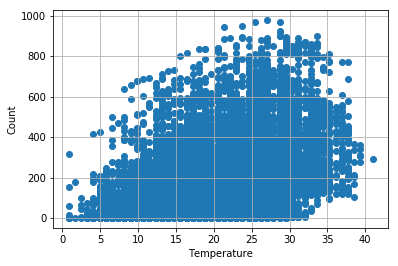

In [26]:
plt.scatter(x=df.temp,y=df["count"],label='Temperature')
plt.grid(True)
plt.xlabel('Temperature')
plt.ylabel('Count')

Text(0,0.5,'Count')

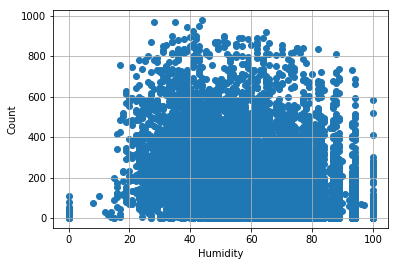

In [27]:
plt.scatter(x=df.humidity,y=df["count"],label='Humidity')
plt.grid(True)
plt.xlabel('Humidity')
plt.ylabel('Count')

In [28]:
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
year                   int64
month                  int64
day                    int64
dayofweek              int64
dtype: object

In [29]:
# Save all data
df.to_csv('bike_all.csv',index=False,
          columns=columns)

## Training and Validation Set
### Target Variable as first column followed by input features
### Training, Validation files do not have a column header

In [30]:
# Training = 70% of the data
# Validation = 30% of the data
# Randomize the datset
np.random.seed(5)
l = list(df.index)
np.random.shuffle(l)
df = df.iloc[l]

In [31]:
rows = df.shape[0]
train = int(.7 * rows)
test = int(.3 * rows)

In [32]:
rows, train, test

(10886, 7620, 3265)

In [33]:
columns

['count',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'month',
 'day',
 'dayofweek']

In [34]:
# Write Training Set
df[:train].to_csv('bike_train.csv'
                          ,index=False,header=False
                          ,columns=columns)

In [35]:
# Write Validation Set
df[train:].to_csv('bike_validation.csv'
                          ,index=False,header=False
                          ,columns=columns)

In [36]:
# Test Data has only input features
df_test.to_csv('bike_test.csv',index=False)

In [37]:
','.join(columns)

'count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek'

In [38]:
# Write Column List
with open('bike_train_column_list.txt','w') as f:
    f.write(','.join(columns))

In [ ]:
# continue with biketrain_xgboost_localmode.ipynb